## Lojistik Regresyon Analizi

> Scikit-learn kütüphanesi içinde hazır bir el yazısı rakam veri seti olan digits veri seti bulunmaktadır. Bu veri seti, 8x8 boyutunda siyah-beyaz görüntülerden oluşmaktadır ve 0'dan 9'a kadar olan sayıları içermektedir. 

> Aşağıdaki kod  lojistik regresyon analizi yaparak  8x8 boyutundaki el yazısı görüntüleri üzerinde eğitilir ve daha sonra test setindeki el yazısı görüntülerinin sayılarını tahmin yapar ve son olarak tahminlerin doğruluğunu hesaplar.


In [1]:
# Gerekli kütüphaneleri ekleyelim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics

%matplotlib inline

In [2]:
# Veri setini yükleyelim
digits = load_digits()

In [3]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
# Veri setinin boyutunu yazdıralım (64 boyut için 8'e 8 resim)
print("Image Data Shape" , digits.data.shape)

print("Label Data Shape", digits.target.shape)

print("Label Data ", digits.target)

Image Data Shape (1797, 64)
Label Data Shape (1797,)
Label Data  [0 1 2 ... 8 9 8]


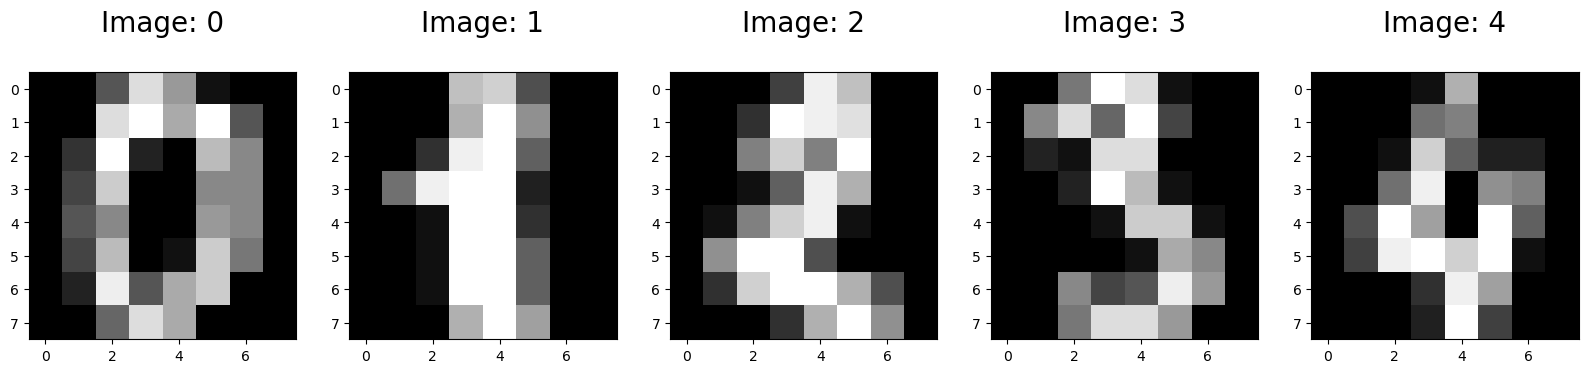

In [5]:
# Görüntüleri ve Etiketleri Gösterme (Rakam Veri Kümesi)

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
    plt.title('Image: %i\n' %label, fontsize=20)

In [6]:
# Verileri Eğitim ve Test Setlerine Bölme (Digits Dataset)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

In [7]:
# Lojistik Regresyonu tanımlıyoruz

logisticRegr = LogisticRegression()

In [8]:
# Verileri eğitilmesi, verilerden öğrenilen bilgilerin saklanması
# Model, x (rakamlar) ve y (etiketler) arasındaki ilişki

logisticRegr.fit(x_train, y_train)

C:\Users\brsme\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
# Numpy döndürür.
# Bir gözlem için tahmin (resim)

logisticRegr.predict(x_test[0].reshape(1,-1))

array([6])

In [10]:
# Aynı anda birden fazla gözlem tahmini (resim) 

logisticRegr.predict(x_test[0:10])

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2])

In [11]:
# Tüm test verileri üzerinde tahminler yapar.

y_pred = logisticRegr.predict(x_test)

In [12]:
# Modelin doğruluğunu hesaplayalım

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9694444444444444


In [13]:
# Modelin doğruluğunu gösteren bir karışıklık matrisi çizelim.

y_pred = logisticRegr.predict(x_test)
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion matrix')
confMatrix

Confusion matrix


array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.9694444444444444')

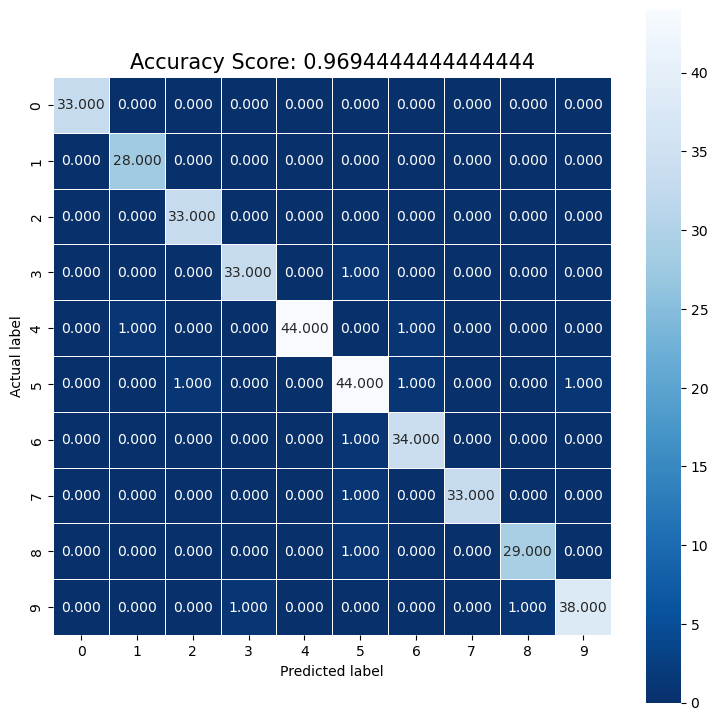

In [20]:
# Seaborn kütüphanesini kullanarak karışıklık matrisini görselleştirelim.

plt.figure(figsize=(9,9))
sns.heatmap(confMatrix, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)